In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


KeyError: 'payment_value'

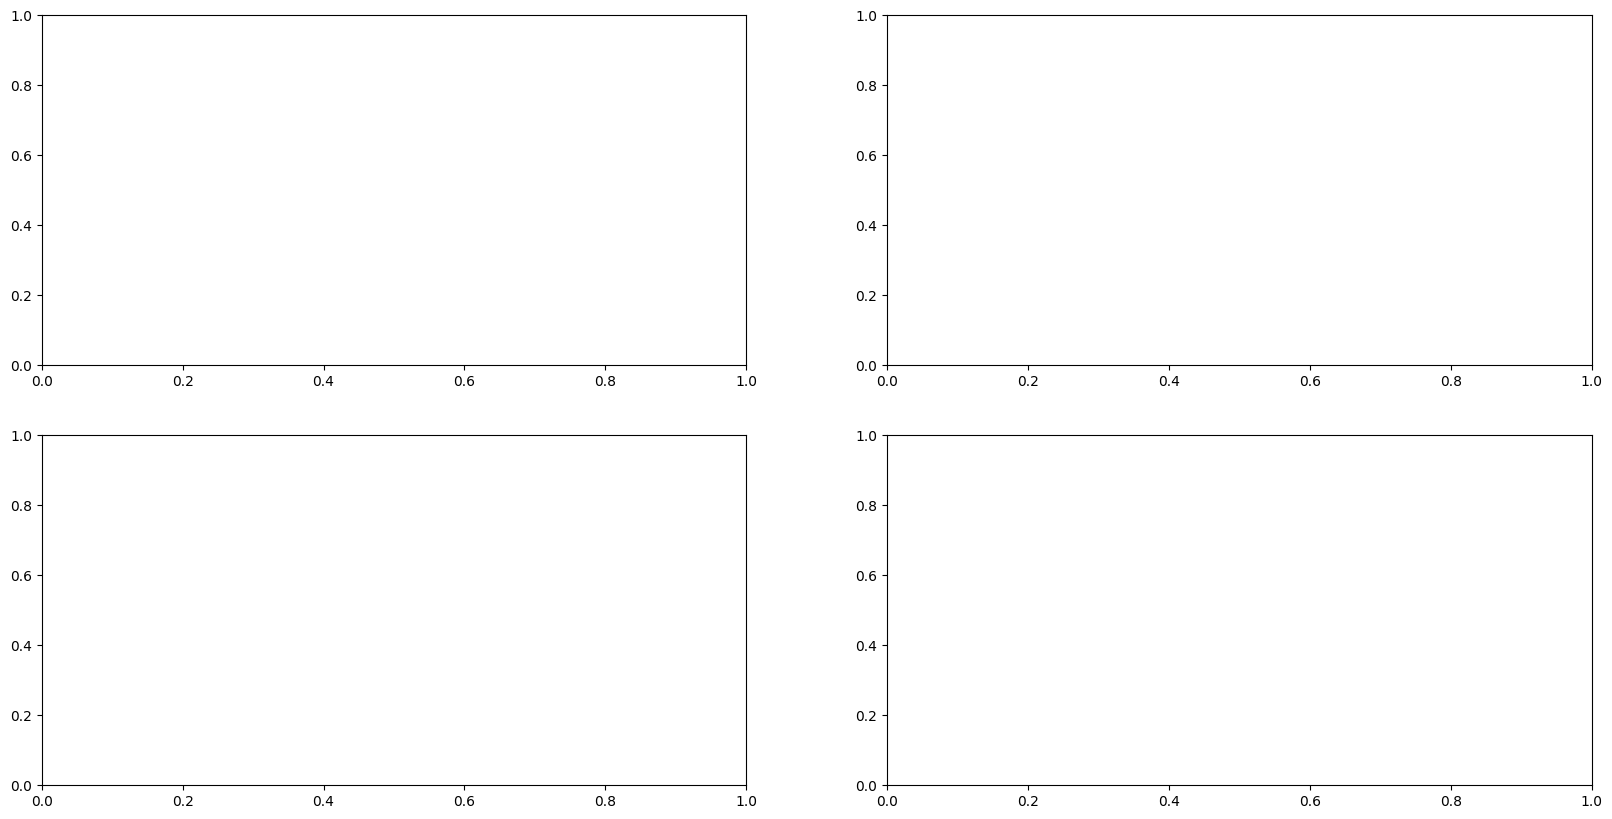

In [29]:


df_customers_dataset = pd.read_csv("data_2/customers_dataset.csv", sep=",")
df_geolocation_dataset = pd.read_csv("data_2/geolocation_dataset.csv", sep=",")
df_order_items_dataset = pd.read_csv("data_2/order_payments_dataset.csv", sep=",")
df_order_payments_dataset = pd.read_csv("data_2/customers_dataset.csv", sep=",")
df_order_review_dataset = pd.read_csv("data_2/order_review_dataset_clean.csv", sep=",")
df_order_dataset = pd.read_csv("data_2/orders_dataset.csv", sep=",")
df_product_categor_name_dataset = pd.read_csv("data_2/product_category_name_translation.csv", sep=",")
df_products_dataset = pd.read_csv("data_2/products_dataset.csv", sep=",")
df_sellers_dataset = pd.read_csv("data_2/sellers_dataset.csv", sep=",")
df_state_name_dataset = pd.read_csv("data_2/state_name.csv", sep=",")


colors = [(1/256,217/256,132/256), (249/256,185/256,0/256), (241/256,62/256,92/256),\
          (31/256,69/256,232/256)] #Vert, Jaune, Rouge, Bleu

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, squeeze=False, figsize=(20, 10))
sns.boxplot(data=df_order_payments_dataset['payment_value'], showfliers=False, ax=ax1, color = colors[0])
sns.boxplot(data=df_order_payments_dataset['payment_value'], showfliers=True, ax=ax2, color = colors[1])
sns.histplot(data=df_order_payments_dataset['payment_value'], ax=ax3, color = colors[2])
# somme_payment = 'Payment value total: ' + str(df_order_payments_dataset['payment_value'].sum())
# ax4.text(0.2, 1.0, somme_payment, fontsize=20, ha='left', va='center')
# somme_payment_wooutlier = 'Payment value total without outliers: ' + str(....sum())
# #ax4.text(0.2, 0.8, somme_payment_woutlier, fontsize=20, ha='left', va='center')
# ax4.axis('off')
ax1.set_title('Payment sans les valeurs extrêmes')
ax2.set_title('Payment avec les valeurs extrêmes')
ax3.set_title('Histogramme des Payment')

In [4]:
df_customers_dataset.head()

,"customer_id""",customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [22]:
df_customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000
